# Project 2: Naive Bayes Document Classifier

In [1]:
from collections import Counter, defaultdict
import scipy.stats as st
import pandas as pd
import numpy as np
import operator
import timeit
import math

In [11]:
df1=pd.read_csv('training.csv',header=None)

In [3]:
vocabulary=pd.read_table('voc.txt',header=None)
df3=pd.read_csv('testing.csv',header=None)

In [4]:
#separate training set from response

dftr=np.asarray(df1.iloc[0:12000,1:61189])
newsgrouplabels=df1.iloc[0:12000,61189]
dft=np.asarray(df3.iloc[0:6775,1:61189])


In [5]:
#calculating the prior probabilities

def prior(response):
    total_observation = len(response)
    probability = dict(Counter(response))
    for key in probability.keys():
        probability[key] = probability[key] / float(total_observation)
    return probability

In [6]:
prior_prob = prior(newsgrouplabels)
#prior_prob

In [7]:
beta=1/61188
alpha=beta+1

In [8]:
#count the occurrences of the features class-wise.

start_time = timeit.default_timer()

groups     = np.unique(newsgrouplabels)
rows, cols  = np.shape(dftr)
LE = {}
for grp in groups:
    LE[grp] = defaultdict(list)

for grp in groups:
    l=[]
    row_no = np.where(newsgrouplabels == grp)[0]
    subset      = dftr[row_no, :]
    r, c        = pd.DataFrame((subset)).shape
    for j in range(0, c):
        l.append((sum(subset[:,j])+(alpha-1))/((sum(pd.DataFrame(subset)))+((alpha-1))*61188))
    LE[grp] = l
    
print("--- %s seconds ---" % (timeit.default_timer() - start_time))

--- 6466.029932985065 seconds ---


In [9]:
#classify the validate sets 

results = {}

def classify(test_sample):
    for cls in groups:
        class_prob = prior_prob[cls]
        for i in range(0,len(test_sample)):
            if test_sample[i] > 0:
                class_prob += math.log10(LE[cls][i])
            else:
                class_prob *= 1
        results[cls] = class_prob    
    return max(results, key=results.get)

In [10]:
#classify all test data

fun_dic={}

start_time = timeit.default_timer()
for fun in range(0,len(dft)):
    fun_dic[df3.iloc[fun,0]]=classify(dft[fun,0:61188])
    
print("--- %s seconds ---" % (timeit.default_timer() - start_time))

--- 2657.064677434426 seconds ---


In [11]:
#export data to csv file

d=pd.DataFrame([fun_dic])
d=d.transpose()
d.to_csv("cs579final.csv")

# confusion matrix for training data

In [15]:
#here we divide training set to 10001 for training and 1999 for validation set

dft1999=dftr[10001:12000, :]
dftr10001=dftr[0:10000, :]
newsgrouplabels100001=newsgrouplabels[0:10000]

In [ ]:
# as stated in question we keep the beta value1/61188

beta=1/61188
alpha=beta+1

#count the occurrences of the features class-wise.

start_time = timeit.default_timer()

groups     = np.unique(newsgrouplabels100001)
rows, cols  = np.shape(dftr10001)
LE = {}
for grp in groups:
    LE[grp] = defaultdict(list)

for grp in groups:
    l=[]
    row_no = np.where(newsgrouplabels100001 == grp)[0]
    subset      = dftr10001[row_no, :]
    r, c        = pd.DataFrame((subset)).shape
    for j in range(0, c):
        l.append((sum(subset[:,j])+(alpha-1))/((sum(pd.DataFrame(subset)))+((alpha-1))*61188))
    LE[grp] = l
    
print("--- %s seconds ---" % (timeit.default_timer() - start_time))

#classify all test data

fun_dic={}

start_time = timeit.default_timer()
for fun in range(0,len(dft1999)):
    fun_dic[dft1999[fun,0]]=classify(dft1999[fun,0:61188])
    
print("--- %s seconds ---" % (timeit.default_timer() - start_time))

#export data to csv file

d=pd.DataFrame([fun_dic])
d=d.transpose()
d.to_csv("beta.tr10001.csv")

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#after classifying the 1999 validation set we got the predicion and orginal class of 1999 document. 

pred2000=pd.read_csv('pred2000.csv',header=None)
res2000=pd.read_csv('2000res.csv',header=None)

In [ ]:
confusion_matrix=pd.DataFrame(confusion_matrix(res2000, pred2000))

In [ ]:
confusion_matrix.to_csv("confusion_matrix2000.csv")

# accuracy plot with beta value

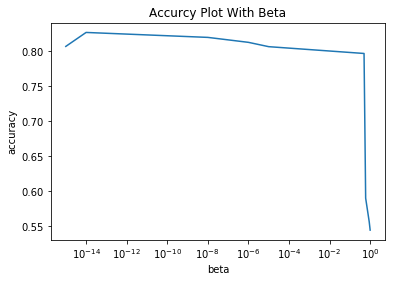

In [17]:
from matplotlib import pyplot
import math
pyplot.plot([.000000000000001,.00000000000001,.00000001,.000001,.00001,.5,.6,.9,1.0],
             [.80728,.82728,.82019,.81310,.80690,.79716,.58990,.55594,.54413] )
pyplot.xlabel('beta')
pyplot.ylabel('accuracy')
pyplot.title('Accurcy Plot With Beta')

#pyplot.xscale('log')
pyplot.xscale('log')

pyplot.show()

# calculate highest ranking word

In [18]:
pos_p=pd.DataFrame(LE)
pos_p=pos_p.transpose()

In [19]:
#function for calculating entropy of 20*61188 matrix to get individual entropy of words.

def entropy(s):
    res = 0
    val, counts = np.unique(s, return_counts=True)
    freqs = counts.astype('float')/len(s)
    for p in freqs:
        if p != 0.0:
            res -= p * np.log2(p)
    return res

In [21]:
voca=list(vocabulary.iloc[1:61189,0])

col_entropy={}

ro,co=pos_p.shape

for r in range(0,co):
    col_entropy[voca[r]]=entropy(pos_p[r])

In [22]:
newA = dict(sorted(col_entropy.items(), key=operator.itemgetter(1), reverse=False))

In [23]:
del_zero={x:y for x,y in newA.items() if y!=0}

In [24]:
dict(sorted(del_zero.items(), key=operator.itemgetter(1), reverse=False)[:100]).keys()

dict_keys(['ffrf', 'postpaid', 'figmo', 'haught', 'freethought', 'aah', 'rationalist', 'islington', 'freethinker', 'ibka', 'internationaler', 'konfessionslosen', 'atheisten', 'materialien', 'informationen', 'politisches', 'konfessionslosesn', 'hrsg', 'vertrieb', 'ibdk', 'ucherdienst', 'disch', 'canticle', 'leibowitz', 'doomsday', 'blueprints', 'pangborn', 'approachable', 'healer', 'craftsmen', 'earthers', 'fernwright', 'dismissively', 'handmaid', 'theocracy', 'retroactively', 'vicars', 'enlighting', 'adulteries', 'gottes', 'diener', 'dunkle', 'seite', 'papsttums', 'droemer', 'knaur', 'refutations', 'contempory', 'platinga', 'swinburne', 'unsupportable', 'subtitled', 'secularization', 'ballantine', 'clarendon', 'trilogy', 'posthumous', 'anselm', 'sidgwick', 'restatements', 'theses', 'plantinga', 'lelie', 'axiarchism', 'refreshingly', 'anthology', 'unfathomable', 'mutations', 'johnsd', 'jec', 'unamerican', 'propogation', 'golen', 'kuweit', 'psycholgical', 'parallelism', 'bobbe', 'beaucha